In [53]:
import pandas as pd
import numpy as np
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word, TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [54]:
def clean_text(text):
    # Büyük küçük harf dönüşümü
    text = text.lower()
    
    # Noktalama işaretlerini çıkarma
    text = re.sub(r'[^\w\s]', '', text)
    
    # Numerik ifadeleri çıkarma
    text = re.sub(r'\d+', '', text)
    
    return text


In [55]:
df = pd.read_csv("C:\\Users\\Sariye\\Desktop\\miuul-ödev\\wiki\\wiki_data.csv" , sep=",")

In [56]:
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [57]:
df['text'] = df['text'].apply(clean_text)

In [58]:
df.head()

,Unnamed: 0,text
0,1,anovo\n\nanovo formerly a novo is a computer s...
1,2,battery indicator\n\na battery indicator also ...
2,3,bob pease\n\nrobert allen pease august â â ju...
3,4,cavnet\n\ncavnet was a secure military forum w...
4,5,clidar\n\nthe clidar is a scientific instrumen...


In [59]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(str(text))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [60]:
# Belirli sütunu temizleme
df['text'] = df['text'].apply(remove_stopwords)

In [61]:
# e. 1000'den az geçen kelimeleri çıkarma
temp_df = pd.Series(' '.join(df['text']).split()).value_counts()

drops = temp_df[temp_df < 1000]

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [62]:
#tokenization
df["text"].apply(lambda x: TextBlob(x).words).head()

0    [computer, services, company, based, france, f...
1    [battery, battery, also, known, battery, devic...
2    [august, â, â, june, analog, integrated, circu...
3    [military, became, april, part, allows, access...
4    [scientific, instrument, used, lower, camera, ...
Name: text, dtype: object

In [63]:
# Lemmatization
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

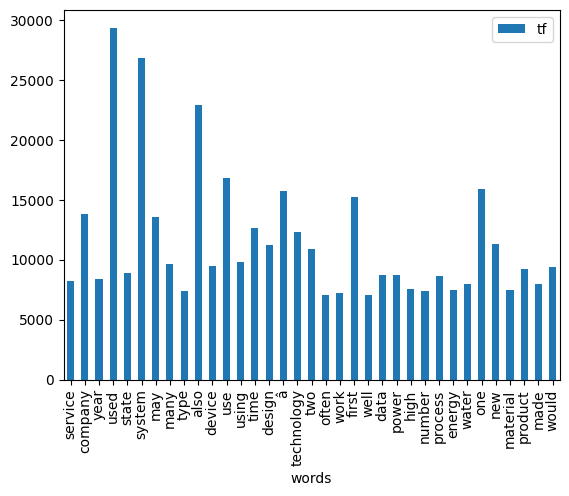

In [64]:
# Terim Frekanslarının Hesaplanması
###############################

tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)


tf[tf["tf"] > 7000].plot.bar(x="words", y="tf")
plt.show()

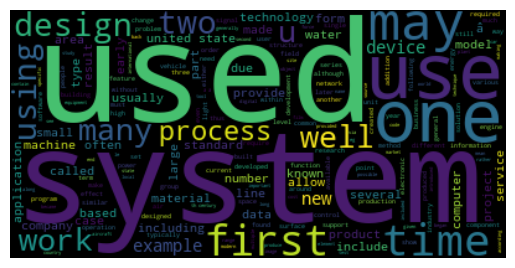

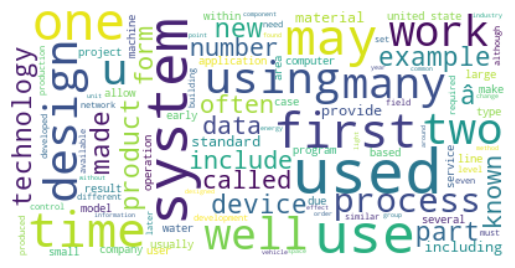

In [65]:
# Wordcloud
###############################

text = " ".join(i for i in df.text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

In [66]:
#tüm işlemleri tek bir fonksiyonda yapma
def wiki_preprocess(text,Barplot=False,WordCloud=False):
    text = text.str.lower()
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace('\n','')
    
    text = text.str.replace('\d','')
    
    sw=stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    #rarewords / Custom words
    drops = pd.Series(''.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in drops))
    
    if Barplot:
        #Terim frekanslarının Hesaplanması
        tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
        #sütunların isimlendirilmesi
        tf.colums = ["words","tf"]
        #5000 den fazla geçen kelimelerin görselleştirilmesi
        tf[tf["tf"]>5000].plot.bar(x="words",y="tf")
        plt.show()
        
    if WordCloud:
        #Kelimeleri birleştirdik
        text = " ".join(i for i in text)
        #wordcloud görselleştirmenin özelliklerini belirliyoruz
        wordcloud = WordCloud(max_font_size = 50,
                              max_words=100,
                              background_color = "white").generete(text)
        plt.figure()
        plt.inshow(wordcloud,interpolation='bilinear')
        plt.axis("off")
        plt.show()
        
    return text
        
        

In [67]:
wiki_preprocess(text)
wiki_preprocess(text,True ,True)



C:\Users\Sariye\AppData\Local\Temp\ipykernel_12528\3568393701.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tf.colums = ["words","tf"]


KeyError: 'tf'